In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("fivethirtyeight")

In [3]:
!ls ../../datasets/fifa_world_cup_2022/

fifa_world_cup_2022.csv


In [53]:
df = pd.read_csv("../../datasets/fifa_world_cup_2022/fifa_world_cup_2022.csv")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993


In [54]:
df.shape

(23921, 26)

In [55]:
def get_2022_players():
    df = pd.read_csv("../datasets/international_football_results/results_preprocessed.csv")
    players = (
        df[
            (df.tournament == 'FIFA World Cup')
            & (df.year == 2022)
        ]
        [['home_team', 'away_team']]
        .to_numpy()
        .flatten()
    )
    return np.unique(players)

players2022 = get_2022_players()
players2022

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'United States', 'Uruguay', 'Wales'], dtype=object)

In [56]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
year                     

In [57]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,2022
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,2022
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0,2022
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8,2022


In [58]:
# Nulls for 2022 players

In [59]:
df_cup_players = df[(df.home_team.isin(players2022)) | (df.away_team.isin(players2022))]
df_cup_players.shape

(8480, 26)

In [60]:
df_cup_players.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       4198
away_team_goalkeeper_score       4262
home_team_mean_defense_score     4214
home_team_mean_offense_score     4073
home_team_mean_midfield_score    4123
away_team_mean_defense_score     4277
away_team_mean_offense_score     4125
away_team_mean_midfield_score    4182
year                                0
dtype: int64

In [61]:
df_cup_players.isnull().sum() / df_cup_players.shape[0]

date                             0.000000
home_team                        0.000000
away_team                        0.000000
home_team_continent              0.000000
away_team_continent              0.000000
home_team_fifa_rank              0.000000
away_team_fifa_rank              0.000000
home_team_total_fifa_points      0.000000
away_team_total_fifa_points      0.000000
home_team_score                  0.000000
away_team_score                  0.000000
tournament                       0.000000
city                             0.000000
country                          0.000000
neutral_location                 0.000000
shoot_out                        0.000000
home_team_result                 0.000000
home_team_goalkeeper_score       0.495047
away_team_goalkeeper_score       0.502594
home_team_mean_defense_score     0.496934
home_team_mean_offense_score     0.480307
home_team_mean_midfield_score    0.486203
away_team_mean_defense_score     0.504363
away_team_mean_offense_score     0

In [62]:
_df = df_cup_players[df_cup_players.year > 2005]

_df.isnull().sum() / _df.shape[0]

date                             0.000000
home_team                        0.000000
away_team                        0.000000
home_team_continent              0.000000
away_team_continent              0.000000
home_team_fifa_rank              0.000000
away_team_fifa_rank              0.000000
home_team_total_fifa_points      0.000000
away_team_total_fifa_points      0.000000
home_team_score                  0.000000
away_team_score                  0.000000
tournament                       0.000000
city                             0.000000
country                          0.000000
neutral_location                 0.000000
shoot_out                        0.000000
home_team_result                 0.000000
home_team_goalkeeper_score       0.199120
away_team_goalkeeper_score       0.212315
home_team_mean_defense_score     0.201519
home_team_mean_offense_score     0.174530
home_team_mean_midfield_score    0.185126
away_team_mean_defense_score     0.215114
away_team_mean_offense_score     0

In [32]:
df_cup_players['date'] = pd.to_datetime(df_cup_players['date'])
df_cup_players = df_cup_players.assign(year = df_cup_players.date.dt.year)

df_cup_players

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,year
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
9,1993-08-11,Sweden,Switzerland,Europe,Europe,4,3,0,0,1,...,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23907,2022-06-14,Germany,Italy,Europe,Europe,12,6,1650,1723,5,...,Win,90.0,89.0,84.0,82.7,87.8,84.2,85.3,84.5,2022
23908,2022-06-14,Netherlands,Wales,Europe,Europe,10,18,1658,1588,3,...,Win,81.0,74.0,85.2,83.0,83.5,75.0,73.0,78.5,2022
23909,2022-06-14,Poland,Belgium,Europe,Europe,26,2,1544,1827,0,...,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5,2022
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2,2022


In [37]:
df_cup_players.home_team_goalkeeper_score.isnull()

0         True
1         True
2         True
4         True
9         True
         ...  
23907    False
23908    False
23909    False
23918    False
23919    False
Name: home_team_goalkeeper_score, Length: 8480, dtype: bool

Text(0, 0.5, 'Partidas')

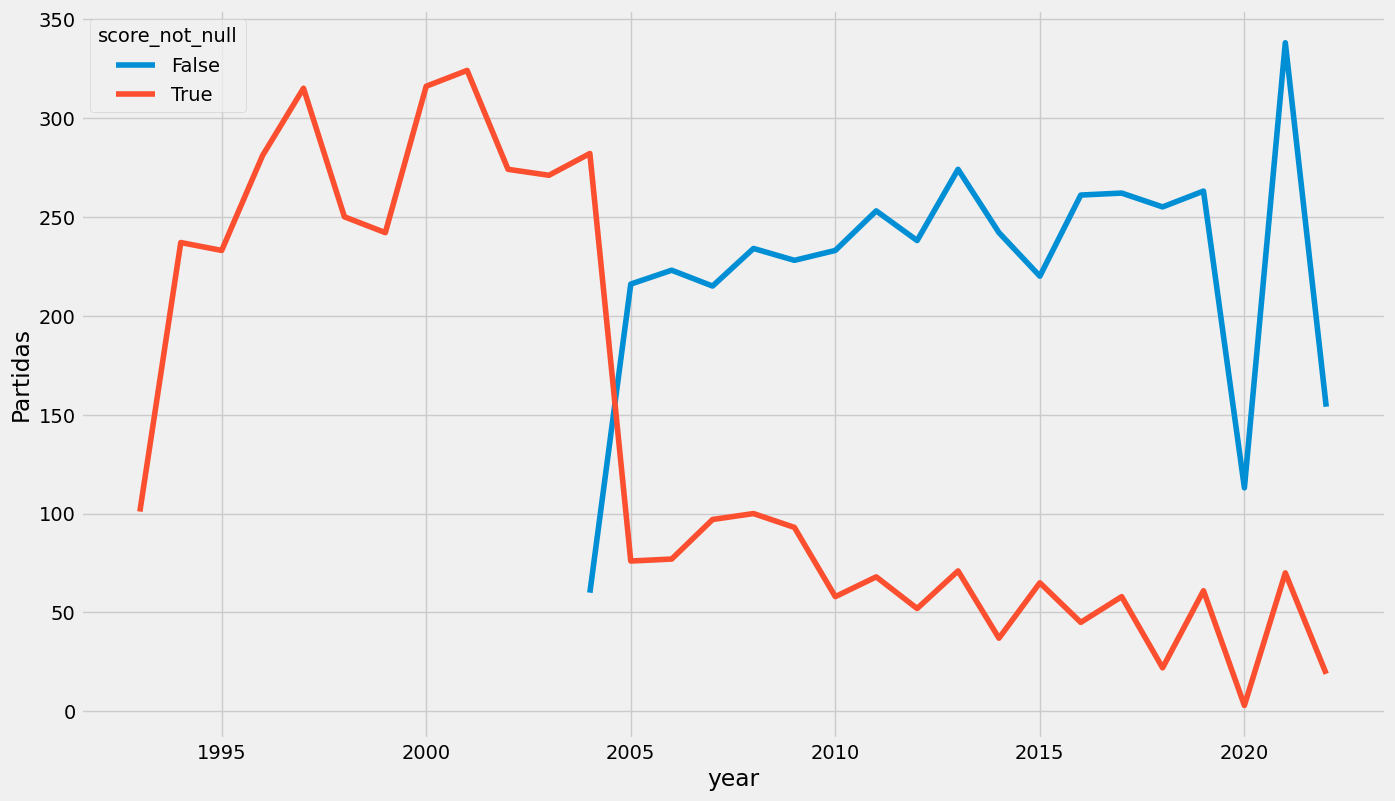

In [48]:
_df = (
    df_cup_players
    .assign(score_not_null = df_cup_players.home_team_goalkeeper_score.isnull())
    .groupby(["year", 'score_not_null'])
    ['home_team']
    .count()
    .reset_index()
)
f,ax = plt.subplots(figsize=(15,9))
sns.lineplot(data=_df, x='year', y='home_team', hue='score_not_null', ax=ax)
ax.set_ylabel("Partidas")

In [ ]:
_df = 